# Denoising by Delaunay triangulation on zeros

In [1]:
import numpy as np
from numpy import pi as pi
import seaborn as sns
import matplotlib.pyplot as plt
import cmocean
from benchmark_demo.utilstf import *
from benchmark_demo.SignalBank import SignalBank
from methods.method_delaunay_triangulation import delaunay_triangulation_denoising, block_based_dt_denoising

In [2]:
# np.random.seed(10)
# signal parameters
SNRin = 30
N = 2**13
# Nsub = 2**12
sbank = SignalBank(N=N,)
tmin = sbank.tmin
tmax = sbank.tmax
# s = sbank.signal_linear_chirp()
# s = sbank.signal_mc_parallel_chirps_unbalanced()
# s = sbank.signal_mc_parallel_chirps()

# s = sbank.signal_mc_multi_linear()
# s = sbank.signal_cos_chirp()
# s = sbank.signal_mc_double_cos_chirp()
# s = sbank.signal_mc_on_off_tones()
# s = sbank.signal_mc_synthetic_mixture_2() # Mala.
s = sbank.signal_hermite_function()
# s = sbank.signal_mc_multi_cos_2()

signal, noise = add_snr(s,SNRin, complex_noise=False)
# signal = s + noise*np.sqrt(N/Nsub) 

snr_out:30.0


0
Block
512
Block
1024
Block
1536
Block
2048
Block
2560
Block
3072
Block
3584
Block
4096
Block
4608
Block
5120
Block
5632
Block
6144
Block
6656
Block
7168
Block
7680
Block
Invertion...


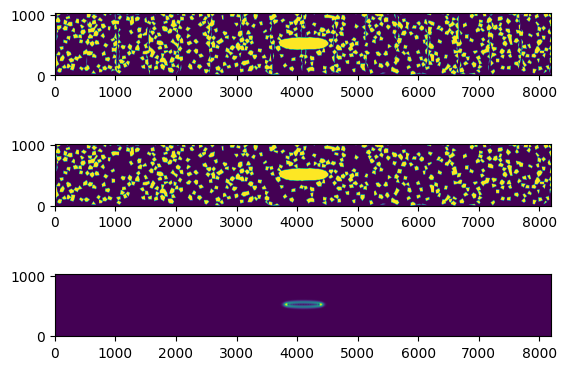

In [3]:
# Nfft = 2*N
# g,T = get_round_window(Nfft)
# Lx = Nfft/T
# S, F, stft_padded, Npad = get_spectrogram(signal, window = g)

mask, stft, signal_output = block_based_dt_denoising(signal,
                                block_len=1024,
                                grouping = False,
                                min_group_size=5,
                                LB = 1.6,
                                )

output = delaunay_triangulation_denoising(signal,
                                return_dic=True,
                                grouping = False,
                                Nfft = 2*1024,
                                # min_group_size=5,
                                LB = 1.6,
                                )                               

signal_output2, mask2, _, _, _ = ( output[key] for key in 
                                    ('s_r','mask','tri','tri_select','zeros')
                                    )

#  = block_based_dt_denoising(signal,block_len=1024)

fig, axs = plt.subplots(3,1)
axs[0].imshow(mask, origin='lower')
axs[1].imshow(mask2, origin='lower')
axs[2].imshow(np.abs(stft), origin='lower')


In [4]:
# F_output, _, _, _ = get_spectrogram(signal_output, window = g)
print(10*np.log10((np.sum(s**2))/(np.sum((s-signal_output)**2))))

35.235947183225576


NameError: name 'F_output' is not defined

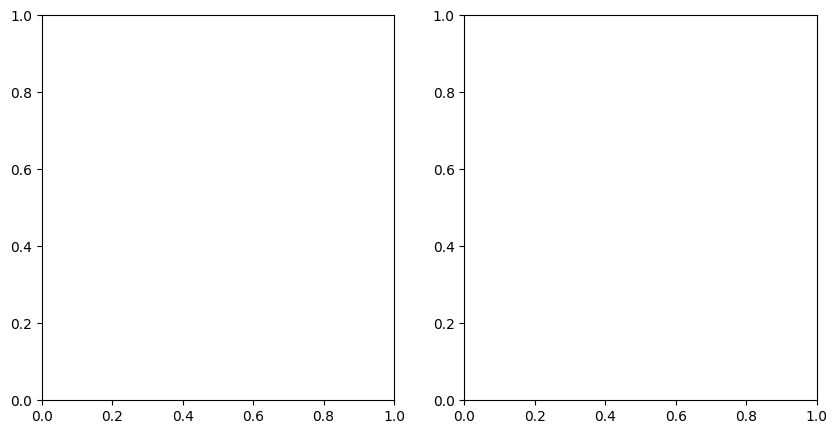

In [5]:
fig, ax = plt.subplots(1,2,figsize = (10,5))
# ax[0].imshow(abs(F), origin='lower')#, cmap=cmocean.cm.deep)
ax[1].imshow(abs(F_output), origin='lower')#, cmap=cmocean.cm.deep)

# ax[0].plot(signal.instf[0]*Nfft,'r')
# ax[0].plot(signal.instf[1]*Nfft,'r')
# ax[0].plot(signal.instf[2]*Nfft,'r')
plt.show()